In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data=pd.read_csv('CarPrice_Assignment.csv')

**Data Analysis**

In [3]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [5]:
data['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [6]:
data['fueltype'].unique()

array(['gas', 'diesel'], dtype=object)

In [7]:
data['aspiration'].unique()

array(['std', 'turbo'], dtype=object)

In [8]:
data['doornumber'].unique()

array(['two', 'four'], dtype=object)

In [9]:
data['carbody'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [10]:
data['drivewheel'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [11]:
data['enginelocation'].unique()

array(['front', 'rear'], dtype=object)

In [12]:
data['enginetype'].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [13]:
data['cylindernumber'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [14]:
data['fuelsystem'].unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

**Label Encoding**

In [15]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
data['CarName']=labelencoder.fit_transform(data['CarName'])
data['carbody']=labelencoder.fit_transform(data['carbody'])
data['drivewheel']=labelencoder.fit_transform(data['drivewheel'])
data['enginetype']=labelencoder.fit_transform(data['enginetype'])
data['cylindernumber']=labelencoder.fit_transform(data['cylindernumber'])
data['fuelsystem']=labelencoder.fit_transform(data['fuelsystem'])

In [16]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2,gas,std,two,0,2,front,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,3,gas,std,two,0,2,front,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,1,gas,std,two,2,2,front,94.5,171.2,65.5,52.4,2823,5,3,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,4,gas,std,four,3,1,front,99.8,176.6,66.2,54.3,2337,3,2,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,5,gas,std,four,3,0,front,99.4,176.6,66.4,54.3,2824,3,1,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


**One hot encoding**

In [17]:
def oneHotEncoding(x,column_name):
  data=pd.get_dummies(x)
  del data[data.columns[0]]
  data.columns=[column_name]
  return data


In [18]:
data['fueltype']=oneHotEncoding(data['fueltype'],'fueltype')
data['aspiration']=oneHotEncoding(data['aspiration'],'aspiration')
data['doornumber']=oneHotEncoding(data['doornumber'],'doornumber')
data['doornumber']=oneHotEncoding(data['doornumber'],'doornumber')
data['enginelocation']=oneHotEncoding(data['enginelocation'],'enginelocation')

In [19]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,3,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,1,1,0,1,2,2,0,94.5,171.2,65.5,52.4,2823,5,3,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,4,1,0,0,3,1,0,99.8,176.6,66.2,54.3,2337,3,2,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,5,1,0,0,3,0,0,99.4,176.6,66.4,54.3,2824,3,1,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


**Correlation checking**

In [20]:
data.shape

(205, 26)

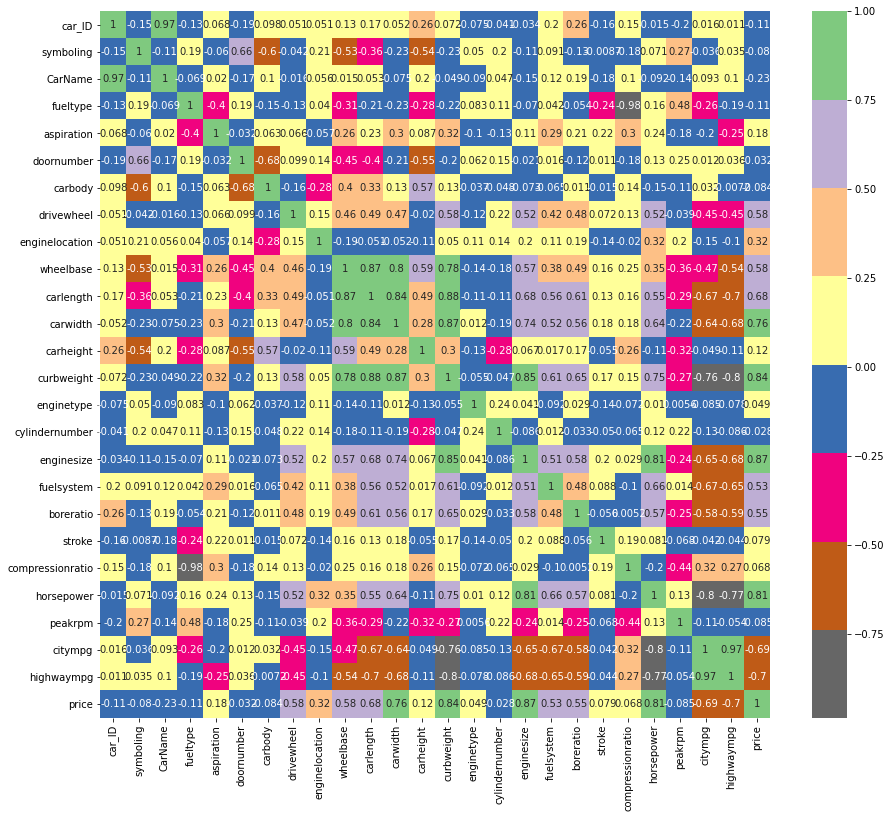

In [21]:
import seaborn as sns
plt.figure(figsize=(15,13))
cor_data=data
cor=cor_data.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.Accent_r)
plt.show()

**From above diagram we can see that highwaympg and citympg are correlated**

In [22]:
data.drop(['highwaympg'],axis=1,inplace=True)

**Splitting training and testing data**

In [23]:
from sklearn.model_selection import train_test_split
train_data,test_data=train_test_split(data,test_size=0.05)

In [24]:
train_data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price
82,83,3,68,1,1,1,2,1,0,95.9,173.2,66.3,50.2,2833,3,2,156,6,3.58,3.860,7.0,145,5000,19,12629.0
87,88,1,68,1,1,0,3,1,0,96.3,172.4,65.4,51.6,2403,3,2,110,6,3.17,3.460,7.5,116,5500,23,9279.0
54,55,1,58,1,0,0,3,1,0,93.1,166.8,64.2,54.1,1950,3,2,91,1,3.08,3.150,9.0,68,5000,31,7395.0
75,76,1,62,1,1,1,2,2,0,102.7,178.4,68.0,54.8,2910,3,2,140,5,3.78,3.120,8.0,175,5000,19,16503.0
76,77,2,65,1,0,1,2,1,0,93.7,157.3,64.4,50.8,1918,3,2,92,1,2.97,3.230,9.4,68,5500,37,5389.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,84,3,63,1,1,1,2,1,0,95.9,173.2,66.3,50.2,2921,3,2,156,6,3.59,3.860,7.0,145,5000,19,14869.0
162,163,0,125,1,0,0,3,1,0,95.7,166.3,64.4,52.8,2140,3,2,98,1,3.19,3.030,9.0,70,4800,28,9258.0
56,57,3,54,1,0,1,2,2,0,95.3,169.0,65.7,49.6,2380,6,6,70,2,3.33,3.255,9.4,101,6000,17,11845.0
67,68,-1,19,0,1,0,3,2,0,110.0,190.9,70.3,56.5,3515,3,1,183,3,3.58,3.640,21.5,123,4350,22,25552.0


In [25]:
test_data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price
11,12,0,10,1,0,0,3,2,0,101.2,176.8,64.8,54.3,2395,3,2,108,5,3.50,2.80,8.8,101,5800,23,16925.0
148,149,0,107,1,0,0,4,0,0,96.9,173.6,65.4,54.9,2420,4,2,108,1,3.62,2.64,9.0,82,4800,23,8013.0
63,64,0,58,0,0,0,3,1,0,98.8,177.8,66.5,55.5,2443,3,2,122,3,3.39,3.39,22.7,64,4650,36,10795.0
7,8,1,7,1,0,0,4,1,0,105.8,192.7,71.4,55.7,2954,3,1,136,5,3.19,3.40,8.5,110,5500,19,18920.0
171,172,2,115,1,0,1,2,2,0,98.4,176.2,65.6,52.0,2714,3,2,146,5,3.62,3.50,9.3,116,4800,24,11549.0
172,173,2,124,1,0,1,0,2,0,98.4,176.2,65.6,53.0,2975,3,2,146,5,3.62,3.50,9.3,116,4800,24,17669.0
64,65,0,53,1,0,0,2,1,0,98.8,177.8,66.5,55.5,2425,3,2,122,1,3.39,3.39,8.6,84,4800,26,11245.0
19,20,1,25,1,0,1,2,1,0,94.5,155.9,63.6,52.0,1874,3,2,90,1,3.03,3.11,9.6,70,5400,38,6295.0
13,14,0,12,1,0,0,3,2,0,101.2,176.8,64.8,54.3,2765,3,3,164,5,3.31,3.19,9.0,121,4250,21,21105.0
153,154,0,121,1,0,0,4,1,0,95.7,169.7,63.6,59.1,2280,3,2,92,1,3.05,3.03,9.0,62,4800,31,6918.0


In [26]:
X_train=train_data
Y_train=train_data['price']

In [27]:
del X_train['price']

In [28]:
X_train

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg
82,83,3,68,1,1,1,2,1,0,95.9,173.2,66.3,50.2,2833,3,2,156,6,3.58,3.860,7.0,145,5000,19
87,88,1,68,1,1,0,3,1,0,96.3,172.4,65.4,51.6,2403,3,2,110,6,3.17,3.460,7.5,116,5500,23
54,55,1,58,1,0,0,3,1,0,93.1,166.8,64.2,54.1,1950,3,2,91,1,3.08,3.150,9.0,68,5000,31
75,76,1,62,1,1,1,2,2,0,102.7,178.4,68.0,54.8,2910,3,2,140,5,3.78,3.120,8.0,175,5000,19
76,77,2,65,1,0,1,2,1,0,93.7,157.3,64.4,50.8,1918,3,2,92,1,2.97,3.230,9.4,68,5500,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,84,3,63,1,1,1,2,1,0,95.9,173.2,66.3,50.2,2921,3,2,156,6,3.59,3.860,7.0,145,5000,19
162,163,0,125,1,0,0,3,1,0,95.7,166.3,64.4,52.8,2140,3,2,98,1,3.19,3.030,9.0,70,4800,28
56,57,3,54,1,0,1,2,2,0,95.3,169.0,65.7,49.6,2380,6,6,70,2,3.33,3.255,9.4,101,6000,17
67,68,-1,19,0,1,0,3,2,0,110.0,190.9,70.3,56.5,3515,3,1,183,3,3.58,3.640,21.5,123,4350,22


In [29]:
Y_train

82     12629.0
87      9279.0
54      7395.0
75     16503.0
76      5389.0
        ...   
83     14869.0
162     9258.0
56     11845.0
67     25552.0
28      8921.0
Name: price, Length: 194, dtype: float64

**Multiple linear regression**

In [30]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
X_test=test_data
Y_test=test_data['price']
del X_test['price']

In [32]:
y_pred = regressor.predict(X_test)

In [33]:
y_pred

array([15187.59115239,  8023.05096916, 12873.46951768, 20674.37214973,
       12829.98773271, 14673.597908  , 12714.62663928,  7964.78101247,
       17969.29668331,  5365.24143835,  8528.48683401])

In [34]:
Y_test

11     16925.0
148     8013.0
63     10795.0
7      18920.0
171    11549.0
172    17669.0
64     11245.0
19      6295.0
13     21105.0
153     6918.0
144     9233.0
Name: price, dtype: float64

In [35]:
from sklearn.metrics import r2_score
r2_score(Y_test, y_pred)

0.8551472046115721